In [1]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from torchvision.transforms.transforms import ToPILImage
from torchvision import transforms
import torch
import torch.nn as nn

d:\ProgrammingRelated\AnacondaNavigator\envs\pytorch_gpu_cuda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from resnet import * 

In [50]:
def ResNetModel(img_channel=3, num_classes=25, norm_type='bn'):
    return ResNet(Block, [2,2,2], img_channel, num_classes, norm_type)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [51]:
model2= ResNetModel(img_channel=3, num_classes=25, norm_type='bn')

In [52]:
model_state = torch.load('simple_model.pth')
print(model_state.keys())

odict_keys(['gamma', 'beta', 'conv1.weight', 'norm.gamma', 'norm.beta', 'layer1.0.conv1.weight', 'layer1.0.nl1.gamma', 'layer1.0.nl1.beta', 'layer1.0.nl2.gamma', 'layer1.0.nl2.beta', 'layer1.0.conv2.weight', 'layer1.0.identity_downsample.0.weight', 'layer1.0.identity_downsample.1.gamma', 'layer1.0.identity_downsample.1.beta', 'layer1.1.conv1.weight', 'layer1.1.nl1.gamma', 'layer1.1.nl1.beta', 'layer1.1.nl2.gamma', 'layer1.1.nl2.beta', 'layer1.1.conv2.weight', 'layer2.0.conv1.weight', 'layer2.0.nl1.gamma', 'layer2.0.nl1.beta', 'layer2.0.nl2.gamma', 'layer2.0.nl2.beta', 'layer2.0.conv2.weight', 'layer2.0.identity_downsample.0.weight', 'layer2.0.identity_downsample.1.gamma', 'layer2.0.identity_downsample.1.beta', 'layer2.1.conv1.weight', 'layer2.1.nl1.gamma', 'layer2.1.nl1.beta', 'layer2.1.nl2.gamma', 'layer2.1.nl2.beta', 'layer2.1.conv2.weight', 'layer3.0.conv1.weight', 'layer3.0.nl1.gamma', 'layer3.0.nl1.beta', 'layer3.0.nl2.gamma', 'layer3.0.nl2.beta', 'layer3.0.conv2.weight', 'layer3.

In [53]:
# Print all parameters
for name, param in model2.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: gamma, Shape: torch.Size([1, 16, 1, 1])
Parameter name: beta, Shape: torch.Size([1, 16, 1, 1])
Parameter name: conv1.weight, Shape: torch.Size([16, 3, 3, 3])
Parameter name: layer1.0.conv1.weight, Shape: torch.Size([16, 16, 3, 3])
Parameter name: layer1.0.nl1.gamma, Shape: torch.Size([1, 16, 1, 1])
Parameter name: layer1.0.nl1.beta, Shape: torch.Size([1, 16, 1, 1])
Parameter name: layer1.0.nl2.gamma, Shape: torch.Size([1, 32, 1, 1])
Parameter name: layer1.0.nl2.beta, Shape: torch.Size([1, 32, 1, 1])
Parameter name: layer1.0.conv2.weight, Shape: torch.Size([32, 16, 3, 3])
Parameter name: layer1.0.identity_downsample.0.weight, Shape: torch.Size([32, 16, 1, 1])
Parameter name: layer1.0.identity_downsample.1.gamma, Shape: torch.Size([1, 32, 1, 1])
Parameter name: layer1.0.identity_downsample.1.beta, Shape: torch.Size([1, 32, 1, 1])
Parameter name: layer1.1.conv1.weight, Shape: torch.Size([16, 32, 3, 3])
Parameter name: layer1.1.nl1.gamma, Shape: torch.Size([1, 16, 1, 1])
Pa

In [54]:
model2.load_state_dict(torch.load('simple_model.pth', map_location=device))

<All keys matched successfully>

In [55]:
target_layers = [model2.layer3[-1]]

In [56]:
cam = GradCAM(model=model2, target_layers=target_layers)

In [77]:
targets = [ClassifierOutputTarget(1)]

In [78]:
# Assuming you have 4 image filenames
image_files = ["Brown-Headed-Barbet_373.jpg"]

# Define a transformation to apply to each image
transform = transforms.Compose([
    transforms.Resize((256,256)), 
    transforms.ToTensor()  
])

# Load each image, apply the transformation, and collect them in a list
images = []
for filename in image_files:
    image = Image.open(filename)
    image = transform(image)
    images.append(image)

# Stack the images along a new dimension (0) to create a single tensor
input_tensor = torch.stack(images, dim=0)

# Verify the shape of the final tensor
print(input_tensor.shape)  # Output: torch.Size([4, 3, 224, 224])

torch.Size([1, 3, 256, 256])


In [79]:
rgb_img = cv2.imread("Brown-Headed-Barbet_373.jpg", 1)[:, :, ::-1]
rgb_img = np.float32(rgb_img) / 255

In [80]:
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

In [81]:
# rgb_img=input_tensor

In [82]:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

In [83]:
model_outputs = cam.outputs

In [84]:
model_outputs

tensor([[ 7.7913e+27,  8.0509e+27, -9.1627e+27, -9.0793e+27, -9.6489e+27,
         -9.3021e+27, -7.9663e+27, -9.6867e+27, -8.7786e+27, -1.0168e+28,
         -1.0926e+28, -7.1679e+27, -9.4153e+27, -7.9269e+27, -8.5459e+27,
         -9.3508e+27, -9.2202e+27, -8.2531e+27, -1.0564e+28, -9.4846e+27,
         -7.9251e+27, -1.0616e+28, -8.1261e+27, -8.8387e+27, -9.6340e+27]],
       grad_fn=<AddmmBackward0>)

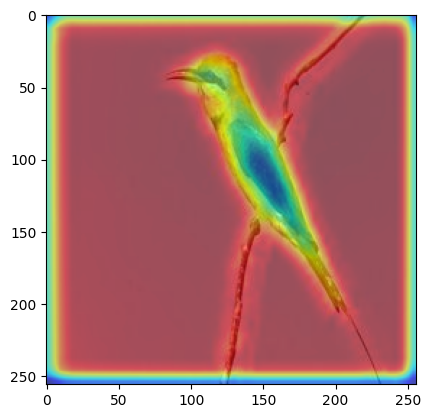

In [85]:
plt.imshow(visualization)